# KC Housesales Data: Predict the house prices in King County, Washington State, USA

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Reading dataset & Data Pre-processing

In [2]:
df=pd.read_csv('kc_house_data.csv')

In [3]:
df.shape

(21597, 21)

In [4]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
pd.DataFrame(df.isna().sum()).T

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#checking for null values in the dataframe
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
# removing unwanted columns from the dataframe
del df['id']
del df['date']

In [9]:
df.shape

(21597, 19)

In [10]:
# changing column 'yr_built' to 'built_age' by subtracting the value from 2020.
df['built_age'] = 2020 - df.yr_built 
df.drop('yr_built',axis=1,inplace=True)

In [11]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,built_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,98178,47.5112,-122.257,1340,5650,65
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,98125,47.7210,-122.319,1690,7639,69
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,98028,47.7379,-122.233,2720,8062,87
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,98136,47.5208,-122.393,1360,5000,55
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,98074,47.6168,-122.045,1800,7503,33


In [12]:
# Splitting independent and dependent variables
X = list(df.iloc[:,1:].values)
y = df.price.values

In [13]:
# Scaling the independent variables
sn = StandardScaler()
X = sn.fit_transform(X)

In [14]:
# Log transforming the dependent variable
y = np.log10(y)

In [14]:
X

array([[-0.40290302, -1.45107268, -0.98065209, ..., -0.94367562,
        -0.26062671,  0.54467809],
       [-0.40290302,  0.17448579,  0.53336915, ..., -0.43288674,
        -0.18769961,  0.68085037],
       [-1.48249316, -1.45107268, -1.4272339 , ...,  1.07029196,
        -0.17219022,  1.29362563],
       ...,
       [-1.48249316, -1.77618438, -1.15492792, ..., -1.41068259,
        -0.39419807, -1.29364769],
       [-0.40290302,  0.49959749, -0.52317805, ..., -0.84151784,
        -0.42059702, -1.12343234],
       [-1.48249316, -1.77618438, -1.15492792, ..., -1.41068259,
        -0.41803046, -1.25960462]])

## Modeling

In [15]:
# Train - validation split
X_train,X_validation,y_train,y_validation = train_test_split(X,y,test_size = 0.3)

## Increasing number of weights (36, 38, 40, 42, 44) while keeping hidden layers constant as 1

### Model 1 (36 nodes, 1 hidden layer)

In [16]:
model1 = Sequential()
model1.add(Dense(36, input_dim=18, activation='sigmoid'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='mean_squared_error', optimizer='SGD')

history1 = model1.fit(X_train, y_train, validation_data=(X_validation,y_validation), epochs=30, batch_size=15117)

Epoch 1/30
1/1 [==============================] - 0s 128ms/step - loss: 24.6509 - val_loss: 24.2224
Epoch 2/30
1/1 [==============================] - 0s 24ms/step - loss: 24.2573 - val_loss: 23.9010
Epoch 3/30
1/1 [==============================] - 0s 28ms/step - loss: 23.9352 - val_loss: 23.6394
Epoch 4/30
1/1 [==============================] - 0s 24ms/step - loss: 23.6727 - val_loss: 23.4257
Epoch 5/30
1/1 [==============================] - 0s 22ms/step - loss: 23.4584 - val_loss: 23.2501
Epoch 6/30
1/1 [==============================] - 0s 25ms/step - loss: 23.2822 - val_loss: 23.1045
Epoch 7/30
1/1 [==============================] - 0s 20ms/step - loss: 23.1361 - val_loss: 22.9827
Epoch 8/30
1/1 [==============================] - 0s 29ms/step - loss: 23.0138 - val_loss: 22.8797
Epoch 9/30
1/1 [==============================] - 0s 28ms/step - loss: 22.9104 - val_loss: 22.7919
Epoch 10/30
1/1 [==============================] - 0s 28ms/step - loss: 22.8223 - val_loss: 22.7164
Epoch 11

### Model 2 (38 nodes, 1 hidden layer)

In [17]:
model2 = Sequential()
model2.add(Dense(38, input_dim=18, activation='sigmoid'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='mean_squared_error', optimizer='SGD')

history2 = model2.fit(X_train, y_train, validation_data=(X_validation,y_validation), epochs=30, batch_size=15117)

Epoch 1/30
1/1 [==============================] - 0s 168ms/step - loss: 26.4647 - val_loss: 25.7798
Epoch 2/30
1/1 [==============================] - 0s 26ms/step - loss: 25.8014 - val_loss: 25.1805
Epoch 3/30
1/1 [==============================] - 0s 27ms/step - loss: 25.2032 - val_loss: 24.6682
Epoch 4/30
1/1 [==============================] - 0s 26ms/step - loss: 24.6918 - val_loss: 24.2457
Epoch 5/30
1/1 [==============================] - 0s 25ms/step - loss: 24.2700 - val_loss: 23.9036
Epoch 6/30
1/1 [==============================] - 0s 26ms/step - loss: 23.9285 - val_loss: 23.6282
Epoch 7/30
1/1 [==============================] - 0s 26ms/step - loss: 23.6535 - val_loss: 23.4059
Epoch 8/30
1/1 [==============================] - 0s 27ms/step - loss: 23.4315 - val_loss: 23.2250
Epoch 9/30
1/1 [==============================] - 0s 27ms/step - loss: 23.2509 - val_loss: 23.0764
Epoch 10/30
1/1 [==============================] - 0s 26ms/step - loss: 23.1025 - val_loss: 22.9531
Epoch 11

### Model 3 (40 nodes, 1 hidden layer)

In [18]:
model3 = Sequential()
model3.add(Dense(40, input_dim=18, activation='sigmoid'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='mean_squared_error', optimizer='SGD')

history3 = model3.fit(X_train, y_train, validation_data=(X_validation,y_validation), epochs=30, batch_size=15117)

Epoch 1/30
1/1 [==============================] - 0s 97ms/step - loss: 29.4401 - val_loss: 28.9560
Epoch 2/30
1/1 [==============================] - 0s 22ms/step - loss: 28.9804 - val_loss: 28.4059
Epoch 3/30
1/1 [==============================] - 0s 25ms/step - loss: 28.4306 - val_loss: 27.7688
Epoch 4/30
1/1 [==============================] - 0s 25ms/step - loss: 27.7939 - val_loss: 27.0673
Epoch 5/30
1/1 [==============================] - 0s 28ms/step - loss: 27.0931 - val_loss: 26.3451
Epoch 6/30
1/1 [==============================] - 0s 21ms/step - loss: 26.3717 - val_loss: 25.6561
Epoch 7/30
1/1 [==============================] - 0s 24ms/step - loss: 25.6835 - val_loss: 25.0445
Epoch 8/30
1/1 [==============================] - 0s 26ms/step - loss: 25.0725 - val_loss: 24.5311
Epoch 9/30
1/1 [==============================] - 0s 27ms/step - loss: 24.5596 - val_loss: 24.1150
Epoch 10/30
1/1 [==============================] - 0s 22ms/step - loss: 24.1438 - val_loss: 23.7832
Epoch 11/

### Model 4 (42 nodes, 1 hidden layer)

In [19]:
model4 = Sequential()
model4.add(Dense(42, input_dim=18, activation='sigmoid'))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(loss='mean_squared_error', optimizer='SGD')

history4 = model4.fit(X_train, y_train, validation_data=(X_validation,y_validation), epochs=30, batch_size=15117)

Epoch 1/30
1/1 [==============================] - 0s 97ms/step - loss: 26.6276 - val_loss: 25.8640
Epoch 2/30
1/1 [==============================] - 0s 22ms/step - loss: 25.8891 - val_loss: 25.1972
Epoch 3/30
1/1 [==============================] - 0s 25ms/step - loss: 25.2226 - val_loss: 24.6344
Epoch 4/30
1/1 [==============================] - 0s 24ms/step - loss: 24.6602 - val_loss: 24.1796
Epoch 5/30
1/1 [==============================] - 0s 28ms/step - loss: 24.2057 - val_loss: 23.8200
Epoch 6/30
1/1 [==============================] - 0s 22ms/step - loss: 23.8463 - val_loss: 23.5368
Epoch 7/30
1/1 [==============================] - 0s 23ms/step - loss: 23.5632 - val_loss: 23.3126
Epoch 8/30
1/1 [==============================] - 0s 28ms/step - loss: 23.3391 - val_loss: 23.1332
Epoch 9/30
1/1 [==============================] - 0s 23ms/step - loss: 23.1598 - val_loss: 22.9878
Epoch 10/30
1/1 [==============================] - 0s 30ms/step - loss: 23.0144 - val_loss: 22.8685
Epoch 11/

### Model 5 (44 nodes, 1 hidden layer)

In [20]:
model5 = Sequential()
model5.add(Dense(44, input_dim=18, activation='sigmoid'))
model5.add(Dense(1, activation='sigmoid'))

model5.compile(loss='mean_squared_error', optimizer='SGD')

history5 = model5.fit(X_train, y_train, validation_data=(X_validation,y_validation), epochs=30, batch_size=15117)

Epoch 1/30
1/1 [==============================] - 0s 96ms/step - loss: 25.8136 - val_loss: 25.1298
Epoch 2/30
1/1 [==============================] - 0s 23ms/step - loss: 25.1652 - val_loss: 24.5855
Epoch 3/30
1/1 [==============================] - 0s 23ms/step - loss: 24.6198 - val_loss: 24.1454
Epoch 4/30
1/1 [==============================] - 0s 23ms/step - loss: 24.1786 - val_loss: 23.7960
Epoch 5/30
1/1 [==============================] - 0s 26ms/step - loss: 23.8284 - val_loss: 23.5197
Epoch 6/30
1/1 [==============================] - 0s 23ms/step - loss: 23.5512 - val_loss: 23.2999
Epoch 7/30
1/1 [==============================] - 0s 24ms/step - loss: 23.3309 - val_loss: 23.1234
Epoch 8/30
1/1 [==============================] - 0s 25ms/step - loss: 23.1538 - val_loss: 22.9799
Epoch 9/30
1/1 [==============================] - 0s 28ms/step - loss: 23.0099 - val_loss: 22.8618
Epoch 10/30
1/1 [==============================] - 0s 25ms/step - loss: 22.8914 - val_loss: 22.7634
Epoch 11/

### Below is plot to compare the relative performance of models when we increase the number of connection weights. We can see from the below plot that increasing the number of weights can help us achieve a low MSE. In this problem, lowest MSE achieved is when we set the weight to 44.

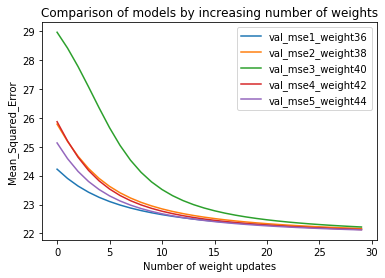

In [21]:
plt.plot(history1.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['val_loss'])
plt.plot(history4.history['val_loss'])
plt.plot(history5.history['val_loss'])
plt.title('Comparison of models by increasing number of weights')
plt.ylabel('Mean_Squared_Error')
plt.xlabel('Number of weight updates')
plt.legend(['val_mse1_weight36', 'val_mse2_weight38', 'val_mse3_weight40', 'val_mse4_weight42', 'val_mse5_weight44'], loc='upper right')
plt.show()

## Increasing number of hidden layers (2, 3, 4, 5, 10) while keeping nodes constant as 2d: 36

### Model 6 (36 nodes, 2 hidden layers)

In [22]:
model6 = Sequential()
model6.add(Dense(36, input_dim=18, activation='sigmoid'))
model6.add(Dense(36, activation='sigmoid'))
model6.add(Dense(1, activation='sigmoid'))

model6.compile(loss='mean_squared_error', optimizer='SGD')

history6 = model6.fit(X_train, y_train, validation_data=(X_validation,y_validation), epochs=30, batch_size=15117)

Epoch 1/30
1/1 [==============================] - 0s 110ms/step - loss: 27.2196 - val_loss: 26.3947
Epoch 2/30
1/1 [==============================] - 0s 27ms/step - loss: 26.4269 - val_loss: 25.6369
Epoch 3/30
1/1 [==============================] - 0s 22ms/step - loss: 25.6685 - val_loss: 24.9721
Epoch 4/30
1/1 [==============================] - 0s 22ms/step - loss: 25.0031 - val_loss: 24.4260
Epoch 5/30
1/1 [==============================] - 0s 24ms/step - loss: 24.4563 - val_loss: 23.9943
Epoch 6/30
1/1 [==============================] - 0s 22ms/step - loss: 24.0240 - val_loss: 23.6580
Epoch 7/30
1/1 [==============================] - 0s 22ms/step - loss: 23.6872 - val_loss: 23.3958
Epoch 8/30
1/1 [==============================] - 0s 23ms/step - loss: 23.4246 - val_loss: 23.1894
Epoch 9/30
1/1 [==============================] - 0s 24ms/step - loss: 23.2178 - val_loss: 23.0247
Epoch 10/30
1/1 [==============================] - 0s 22ms/step - loss: 23.0529 - val_loss: 22.8915
Epoch 11

### Model 7 (36 nodes, 3 hidden layers)

In [23]:
model7 = Sequential()
model7.add(Dense(36, input_dim=18, activation='sigmoid'))
model7.add(Dense(36, activation='sigmoid'))
model7.add(Dense(36, activation='sigmoid'))
model7.add(Dense(1, activation='sigmoid'))

model7.compile(loss='mean_squared_error', optimizer='SGD')

history7 = model7.fit(X_train, y_train, validation_data=(X_validation,y_validation), epochs=30, batch_size=15117)

Epoch 1/30
1/1 [==============================] - 0s 109ms/step - loss: 26.7518 - val_loss: 25.9886
Epoch 2/30
1/1 [==============================] - 0s 24ms/step - loss: 26.0159 - val_loss: 25.3157
Epoch 3/30
1/1 [==============================] - 0s 23ms/step - loss: 25.3428 - val_loss: 24.7404
Epoch 4/30
1/1 [==============================] - 0s 27ms/step - loss: 24.7672 - val_loss: 24.2707
Epoch 5/30
1/1 [==============================] - 0s 23ms/step - loss: 24.2974 - val_loss: 23.8963
Epoch 6/30
1/1 [==============================] - 0s 26ms/step - loss: 23.9229 - val_loss: 23.6002
Epoch 7/30
1/1 [==============================] - 0s 24ms/step - loss: 23.6266 - val_loss: 23.3650
Epoch 8/30
1/1 [==============================] - 0s 24ms/step - loss: 23.3913 - val_loss: 23.1765
Epoch 9/30
1/1 [==============================] - 0s 31ms/step - loss: 23.2028 - val_loss: 23.0237
Epoch 10/30
1/1 [==============================] - 0s 24ms/step - loss: 23.0499 - val_loss: 22.8983
Epoch 11

### Model 8 (36 nodes, 4 hidden layers)

In [24]:
model8 = Sequential()
model8.add(Dense(36, input_dim=18, activation='sigmoid'))
model8.add(Dense(36, activation='sigmoid'))
model8.add(Dense(36, activation='sigmoid'))
model8.add(Dense(36, activation='sigmoid'))
model8.add(Dense(1, activation='sigmoid'))

model8.compile(loss='mean_squared_error', optimizer='SGD')

history8 = model8.fit(X_train, y_train, validation_data=(X_validation,y_validation), epochs=30, batch_size=15117)

Epoch 1/30
1/1 [==============================] - 0s 113ms/step - loss: 25.1140 - val_loss: 24.5232
Epoch 2/30
1/1 [==============================] - 0s 21ms/step - loss: 24.5502 - val_loss: 24.0744
Epoch 3/30
1/1 [==============================] - 0s 22ms/step - loss: 24.1013 - val_loss: 23.7234
Epoch 4/30
1/1 [==============================] - 0s 23ms/step - loss: 23.7501 - val_loss: 23.4494
Epoch 5/30
1/1 [==============================] - 0s 21ms/step - loss: 23.4759 - val_loss: 23.2336
Epoch 6/30
1/1 [==============================] - 0s 22ms/step - loss: 23.2600 - val_loss: 23.0616
Epoch 7/30
1/1 [==============================] - 0s 22ms/step - loss: 23.0879 - val_loss: 22.9226
Epoch 8/30
1/1 [==============================] - 0s 21ms/step - loss: 22.9488 - val_loss: 22.8087
Epoch 9/30
1/1 [==============================] - 0s 21ms/step - loss: 22.8348 - val_loss: 22.7141
Epoch 10/30
1/1 [==============================] - 0s 23ms/step - loss: 22.7401 - val_loss: 22.6345
Epoch 11

### Model 9 (36 nodes, 5 hidden layers)

In [25]:
model9 = Sequential()
model9.add(Dense(36, input_dim=18, activation='sigmoid'))
model9.add(Dense(36, activation='sigmoid'))
model9.add(Dense(36, activation='sigmoid'))
model9.add(Dense(36, activation='sigmoid'))
model9.add(Dense(36, activation='sigmoid'))
model9.add(Dense(1, activation='sigmoid'))

model9.compile(loss='mean_squared_error', optimizer='SGD')

history9 = model9.fit(X_train, y_train, validation_data=(X_validation,y_validation), epochs=30, batch_size=15117)

Epoch 1/30
1/1 [==============================] - 0s 119ms/step - loss: 24.9871 - val_loss: 24.4328
Epoch 2/30
1/1 [==============================] - 0s 24ms/step - loss: 24.4598 - val_loss: 24.0130
Epoch 3/30
1/1 [==============================] - 0s 22ms/step - loss: 24.0398 - val_loss: 23.6831
Epoch 4/30
1/1 [==============================] - 0s 23ms/step - loss: 23.7098 - val_loss: 23.4238
Epoch 5/30
1/1 [==============================] - 0s 23ms/step - loss: 23.4503 - val_loss: 23.2182
Epoch 6/30
1/1 [==============================] - 0s 26ms/step - loss: 23.2445 - val_loss: 23.0531
Epoch 7/30
1/1 [==============================] - 0s 26ms/step - loss: 23.0794 - val_loss: 22.9189
Epoch 8/30
1/1 [==============================] - 0s 23ms/step - loss: 22.9451 - val_loss: 22.8083
Epoch 9/30
1/1 [==============================] - 0s 25ms/step - loss: 22.8344 - val_loss: 22.7160
Epoch 10/30
1/1 [==============================] - 0s 24ms/step - loss: 22.7420 - val_loss: 22.6380
Epoch 11

### Model 10 (36 nodes, 10 hidden layers)

In [26]:
model10 = Sequential()
model10.add(Dense(36, input_dim=18, activation='sigmoid'))
model10.add(Dense(36, activation='sigmoid'))
model10.add(Dense(36, activation='sigmoid'))
model10.add(Dense(36, activation='sigmoid'))
model10.add(Dense(36, activation='sigmoid'))
model10.add(Dense(36, activation='sigmoid'))
model10.add(Dense(36, activation='sigmoid'))
model10.add(Dense(36, activation='sigmoid'))
model10.add(Dense(36, activation='sigmoid'))
model10.add(Dense(36, activation='sigmoid'))
model10.add(Dense(1, activation='sigmoid'))

model10.compile(loss='mean_squared_error', optimizer='SGD')

history10 = model10.fit(X_train, y_train, validation_data=(X_validation,y_validation), epochs=30, batch_size=15117)

Epoch 1/30
1/1 [==============================] - 0s 147ms/step - loss: 25.1933 - val_loss: 24.6134
Epoch 2/30
1/1 [==============================] - 0s 24ms/step - loss: 24.6404 - val_loss: 24.1658
Epoch 3/30
1/1 [==============================] - 0s 25ms/step - loss: 24.1927 - val_loss: 23.8106
Epoch 4/30
1/1 [==============================] - 0s 25ms/step - loss: 23.8372 - val_loss: 23.5298
Epoch 5/30
1/1 [==============================] - 0s 25ms/step - loss: 23.5563 - val_loss: 23.3067
Epoch 6/30
1/1 [==============================] - 0s 26ms/step - loss: 23.3331 - val_loss: 23.1277
Epoch 7/30
1/1 [==============================] - 0s 26ms/step - loss: 23.1540 - val_loss: 22.9823
Epoch 8/30
1/1 [==============================] - 0s 25ms/step - loss: 23.0085 - val_loss: 22.8627
Epoch 9/30
1/1 [==============================] - 0s 24ms/step - loss: 22.8888 - val_loss: 22.7631
Epoch 10/30
1/1 [==============================] - 0s 24ms/step - loss: 22.7891 - val_loss: 22.6792
Epoch 11

### Below is a plot to compare relative model performance by increasing the number of hidden layers. For this problem, MSE is least for the network with 4 hidden layers,  the MSE for hidden layer 4 = 22.0929

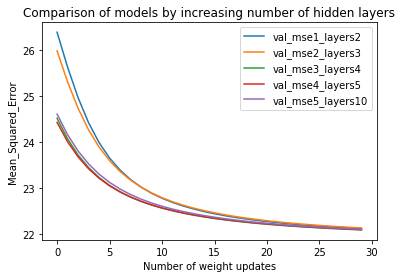

In [27]:
plt.plot(history6.history['val_loss'])
plt.plot(history7.history['val_loss'])
plt.plot(history8.history['val_loss'])
plt.plot(history9.history['val_loss'])
plt.plot(history10.history['val_loss'])
plt.title('Comparison of models by increasing number of hidden layers')
plt.ylabel('Mean_Squared_Error')
plt.xlabel('Number of weight updates')
plt.legend(['val_mse1_layers2', 'val_mse2_layers3', 'val_mse3_layers4', 'val_mse4_layers5', 'val_mse5_layers10'], loc='upper right')
plt.show()

# Compare Performance

## 1) Best results obtained after a large number of computations - Increasing number of Epochs while keeping the number of weights (2d) & layers (single hidden) constant

### Computation 1: Epochs=40

In [28]:
model11 = Sequential()
model11.add(Dense(36, input_dim=18, activation='sigmoid'))
model11.add(Dense(1, activation='sigmoid'))

model11.compile(loss='mean_squared_error', optimizer='SGD')

history11 = model11.fit(X_train, y_train, validation_data=(X_validation,y_validation), epochs=40, batch_size=15117)

Epoch 1/40
1/1 [==============================] - 0s 93ms/step - loss: 28.7983 - val_loss: 28.2521
Epoch 2/40
1/1 [==============================] - 0s 21ms/step - loss: 28.2611 - val_loss: 27.6443
Epoch 3/40
1/1 [==============================] - 0s 21ms/step - loss: 27.6531 - val_loss: 26.9894
Epoch 4/40
1/1 [==============================] - 0s 22ms/step - loss: 26.9979 - val_loss: 26.3256
Epoch 5/40
1/1 [==============================] - 0s 21ms/step - loss: 26.3337 - val_loss: 25.6956
Epoch 6/40
1/1 [==============================] - 0s 23ms/step - loss: 25.7035 - val_loss: 25.1329
Epoch 7/40
1/1 [==============================] - 0s 22ms/step - loss: 25.1404 - val_loss: 24.6531
Epoch 8/40
1/1 [==============================] - 0s 21ms/step - loss: 24.6604 - val_loss: 24.2562
Epoch 9/40
1/1 [==============================] - 0s 25ms/step - loss: 24.2633 - val_loss: 23.9324
Epoch 10/40
1/1 [==============================] - 0s 22ms/step - loss: 23.9394 - val_loss: 23.6694
Epoch 11/

In [29]:
#computational effort
wt_update1 = (model11.count_params())*40
print(wt_update1)

28840


### Computation 2: Epochs=50

In [30]:
model12 = Sequential()
model12.add(Dense(36, input_dim=18, activation='sigmoid'))
model12.add(Dense(1, activation='sigmoid'))

model12.compile(loss='mean_squared_error', optimizer='SGD')

history12 = model12.fit(X_train, y_train, validation_data=(X_validation,y_validation), epochs=50, batch_size=15117)

Epoch 1/50
1/1 [==============================] - 0s 92ms/step - loss: 25.4712 - val_loss: 24.9428
Epoch 2/50
1/1 [==============================] - 0s 21ms/step - loss: 24.9529 - val_loss: 24.4995
Epoch 3/50
1/1 [==============================] - 0s 20ms/step - loss: 24.5098 - val_loss: 24.1307
Epoch 4/50
1/1 [==============================] - 0s 21ms/step - loss: 24.1412 - val_loss: 23.8280
Epoch 5/50
1/1 [==============================] - 0s 20ms/step - loss: 23.8386 - val_loss: 23.5807
Epoch 6/50
1/1 [==============================] - 0s 20ms/step - loss: 23.5913 - val_loss: 23.3781
Epoch 7/50
1/1 [==============================] - 0s 21ms/step - loss: 23.3888 - val_loss: 23.2112
Epoch 8/50
1/1 [==============================] - 0s 21ms/step - loss: 23.2218 - val_loss: 23.0725
Epoch 9/50
1/1 [==============================] - 0s 26ms/step - loss: 23.0830 - val_loss: 22.9561
Epoch 10/50
1/1 [==============================] - 0s 22ms/step - loss: 22.9666 - val_loss: 22.8577
Epoch 11/

In [31]:
#computational effort
wt_update2 = (model11.count_params())*50
print(wt_update2)

36050


### Computation 3: Epochs=60

In [32]:
model13 = Sequential()
model13.add(Dense(36, input_dim=18, activation='sigmoid'))
model13.add(Dense(1, activation='sigmoid'))

model13.compile(loss='mean_squared_error', optimizer='SGD')

history13 = model13.fit(X_train, y_train, validation_data=(X_validation,y_validation), epochs=60, batch_size=15117)

Epoch 1/60
1/1 [==============================] - 0s 93ms/step - loss: 26.8447 - val_loss: 26.1764
Epoch 2/60
1/1 [==============================] - 0s 20ms/step - loss: 26.1847 - val_loss: 25.5569
Epoch 3/60
1/1 [==============================] - 0s 20ms/step - loss: 25.5653 - val_loss: 25.0082
Epoch 4/60
1/1 [==============================] - 0s 21ms/step - loss: 25.0167 - val_loss: 24.5433
Epoch 5/60
1/1 [==============================] - 0s 21ms/step - loss: 24.5518 - val_loss: 24.1601
Epoch 6/60
1/1 [==============================] - 0s 20ms/step - loss: 24.1686 - val_loss: 23.8483
Epoch 7/60
1/1 [==============================] - 0s 21ms/step - loss: 23.8568 - val_loss: 23.5953
Epoch 8/60
1/1 [==============================] - 0s 21ms/step - loss: 23.6038 - val_loss: 23.3892
Epoch 9/60
1/1 [==============================] - 0s 22ms/step - loss: 23.3977 - val_loss: 23.2200
Epoch 10/60
1/1 [==============================] - 0s 21ms/step - loss: 23.2284 - val_loss: 23.0798
Epoch 11/

In [33]:
#computational effort
wt_update3 = (model11.count_params())*60
print(wt_update3)

43260


### Computation 4: Epochs=70

In [34]:
model14 = Sequential()
model14.add(Dense(36, input_dim=18, activation='sigmoid'))
model14.add(Dense(1, activation='sigmoid'))

model14.compile(loss='mean_squared_error', optimizer='SGD')

history14 = model14.fit(X_train, y_train, validation_data=(X_validation,y_validation), epochs=70, batch_size=15117)

Epoch 1/70
1/1 [==============================] - 0s 95ms/step - loss: 29.4892 - val_loss: 29.0730
Epoch 2/70
1/1 [==============================] - 0s 21ms/step - loss: 29.0781 - val_loss: 28.5860
Epoch 3/70
1/1 [==============================] - 0s 21ms/step - loss: 28.5905 - val_loss: 28.0223
Epoch 4/70
1/1 [==============================] - 0s 21ms/step - loss: 28.0264 - val_loss: 27.3948
Epoch 5/70
1/1 [==============================] - 0s 22ms/step - loss: 27.3985 - val_loss: 26.7322
Epoch 6/70
1/1 [==============================] - 0s 21ms/step - loss: 26.7355 - val_loss: 26.0752
Epoch 7/70
1/1 [==============================] - 0s 20ms/step - loss: 26.0784 - val_loss: 25.4647
Epoch 8/70
1/1 [==============================] - 0s 22ms/step - loss: 25.4679 - val_loss: 24.9287
Epoch 9/70
1/1 [==============================] - 0s 23ms/step - loss: 24.9320 - val_loss: 24.4772
Epoch 10/70
1/1 [==============================] - 0s 22ms/step - loss: 24.4808 - val_loss: 24.1064
Epoch 11/

In [35]:
#computational effort
wt_update4 = (model11.count_params())*70
print(wt_update4)

50470


### Computation 5: Epochs=80

In [36]:
model15 = Sequential()
model15.add(Dense(36, input_dim=18, activation='sigmoid'))
model15.add(Dense(1, activation='sigmoid'))

model15.compile(loss='mean_squared_error', optimizer='SGD')

history15 = model15.fit(X_train, y_train, validation_data=(X_validation,y_validation), epochs=80, batch_size=15117)

Epoch 1/80
1/1 [==============================] - 0s 92ms/step - loss: 28.1912 - val_loss: 27.5684
Epoch 2/80
1/1 [==============================] - 0s 19ms/step - loss: 27.5869 - val_loss: 26.9230
Epoch 3/80
1/1 [==============================] - 0s 22ms/step - loss: 26.9418 - val_loss: 26.2736
Epoch 4/80
1/1 [==============================] - 0s 20ms/step - loss: 26.2923 - val_loss: 25.6594
Epoch 5/80
1/1 [==============================] - 0s 19ms/step - loss: 25.6777 - val_loss: 25.1104
Epoch 6/80
1/1 [==============================] - 0s 20ms/step - loss: 25.1282 - val_loss: 24.6407
Epoch 7/80
1/1 [==============================] - 0s 20ms/step - loss: 24.6577 - val_loss: 24.2500
Epoch 8/80
1/1 [==============================] - 0s 19ms/step - loss: 24.2663 - val_loss: 23.9298
Epoch 9/80
1/1 [==============================] - 0s 20ms/step - loss: 23.9455 - val_loss: 23.6685
Epoch 10/80
1/1 [==============================] - 0s 19ms/step - loss: 23.6835 - val_loss: 23.4547
Epoch 11/

In [37]:
#computational effort
wt_update5 = (model11.count_params())*80
print(wt_update5)

57680


### Below is a plot which shows the best results obtained after a large number of computations. Here, we have kept the hidden layers and number of weights fixed and we have varied the number of epochs to see what happens to the MSE. We can see from the plot that for this problem as we go on increasing the number of epochs, the MSE decreases. We have the minimum MSE as 21.96 for epochs=80.

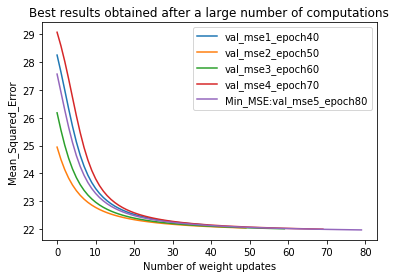

In [38]:
plt.plot(history11.history['val_loss'])
plt.plot(history12.history['val_loss'])
plt.plot(history13.history['val_loss'])
plt.plot(history14.history['val_loss'])
plt.plot(history15.history['val_loss'])
plt.title('Best results obtained after a large number of computations')
plt.ylabel('Mean_Squared_Error')
plt.xlabel('Number of weight updates')
plt.legend(['val_mse1_epoch40', 'val_mse2_epoch50', 'val_mse3_epoch60', 'val_mse4_epoch70', 'Min_MSE:val_mse5_epoch80'], loc='upper right')
plt.show()

## 2) Computational effort required to get satisfactory results (MSE=21.96)

### Below is a plot that shows the computational efforts required to get satisfactory results i.e. in this case: MSE=21.96.... The plot shows that for this problem, MSE decreases with an increase in computational effort. We have reached the lowest MSE=21.96 by increasing the computation efforts to 57680 weight updates. 

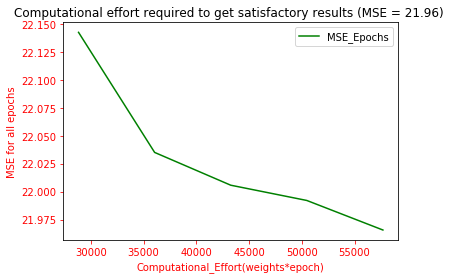

In [44]:
mse_11 = history11.history['val_loss'][-1]
mse_12 = history12.history['val_loss'][-1]
mse_13 = history13.history['val_loss'][-1]
mse_14 = history14.history['val_loss'][-1]
mse_15 = history15.history['val_loss'][-1]

mse_epochs = [mse_11, mse_12, mse_13, mse_14, mse_15]
computational_effort = [wt_update1,wt_update2,wt_update3,wt_update4,wt_update5]

fig=plt.figure()
ax=fig.add_subplot()


ax.plot(computational_effort, mse_epochs, color="g")
ax.set_xlabel("Computational_Effort(weights*epoch)", color="r")
ax.set_ylabel("MSE for all epochs", color="r")
ax.tick_params(axis='x', colors="r")
ax.tick_params(axis='y', colors="r")

ax.legend(['MSE_Epochs'], loc='upper right')
plt.title("Computational effort required to get satisfactory results (MSE = 21.96) ")
plt.show()

### Table - Computational Efforts

<img src="comp.png">